# Task_2_Exploratory_Data_Analysis
## Sub-Task 1:

Import packages

In [1]:
!pip install --upgrade matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.0
    Uninstalling matplotlib-3.3.0:
      Successfully uninstalled matplotlib-3.3.0


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
client_df = pd.read_csv('/content/drive/MyDrive/Just me/Formations/BCG Data Science Virtual Experience Program/TASK2/client_data.csv')
price_df = pd.read_csv('/content/drive/MyDrive/Just me/Formations/BCG Data Science Virtual Experience Program/TASK2/price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

There are 4 features related to date, it is better to convert them to datetime data type.


In [7]:
# convert datetime feature to datetime data type
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[f] = pd.to_datetime(client_df[f])

In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

But values of "channel_sales" and "origin_up" are not understandable, so I convert these features to numeric data type by label encoding.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
# label encoding
channel_encoder = LabelEncoder()
client_df['channel_sales'] = channel_encoder.fit_transform(client_df['channel_sales'])
origin_encoder = LabelEncoder()
client_df['origin_up'] = origin_encoder.fit_transform(client_df['origin_up'])

Now, let's check categorical features.


In [10]:
# 
def describe_categorical(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    if len(cat_columns)!=0:
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
    else:
        print('There is no categorical variables in the dataset')

In [11]:
describe_categorical(client_df)

Categorical variables are ['id', 'has_gas'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d      1    0.000068
1      ab250252dfaded1c9a54834f9c829b43      1    0.000068
2      ab32c3a8d93c88b485499566526cb34d      1    0.000068
3      ab3392ec2bfd3605624f31d3c6828c21      1    0.000068
4      ab346731fef5aa291919ea43e45af5a7      1    0.000068
...                                 ...    ...         ...
14601  55091aace7bd0fadd194f46cb4886fea      1    0.000068
14602  550b8d2f9c298abd8f05fca3bc1a13c4      1    0.000068
14603  5514b18508f378a39f41657554aa72e3      1    0.000068
14604  551cb1b1faf72259c2c182dedec12c98      1    0.000068
14605  ffff7fa066f1fb305ae285bb03bf325a      1    0.000068

[14606 rows x 3 columns] 
--------------------------------------------------------------------------------
  has_gas  count  proportion
0       f  11955    0.818499
1       t   2651    0.181501 
---------------------------------------------------

Now, let's check numeric features.

In [12]:
# dataset: a pandas dataframe;
def describe_numeric(dataset):
    # for numeric columns whose values are discrete, display values and their frequency
    int_columns = dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    # for numeric columns whose values are continuous, plot their value distribution
    float_columns = dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    if len(int_columns)+len(float_columns)!=0:
        print('Numeric variables are', int_columns+float_columns,'\n'+'=='*40)
        # integer numeric feature
        if len(int_columns)!=0:    
            for cat in int_columns:
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
        # 
        print(dataset[int_columns + float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n'+'--'*40)
    else:
        print('There is no numeric variables in the dataset')

In [13]:
describe_numeric(dataset=client_df)

Numeric variables are ['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'] 
   channel_sales  count  proportion
0              4   6754    0.462413
1              0   3725    0.255032
2              5   1843    0.126181
3              7   1375    0.094139
4              2    893    0.061139
5              6     11    0.000753
6              1      3    0.000205
7              3      2    0.000137 
--------------------------------------------------------------------------------
       cons_12m  count  proportion
0             0    117    0.008010
1       2882597     27    0.001849
2       3329244     24    0.001643
3       1743025     18    0.001232

In [14]:
price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [15]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

In [16]:
describe_categorical(dataset=price_df)

Categorical variables are ['id'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d     12    0.000062
1      ab07311332ad017c071947aa1747bf9e     12    0.000062
2      aab99b3be145225dbff8551b256da9e0     12    0.000062
3      aac9a198cee4c2eb9d975ca21b38f00b     12    0.000062
4      aacb5f6ab9d32c8cc9e58c505b028d24     12    0.000062
...                                 ...    ...         ...
16091  83cf18b07114e495ae8b7fb235e45ee2      8    0.000041
16092  223a98d3832ece78cbf279a194868b54      8    0.000041
16093  bf89f2d8c1b133a134fd93603cb4c947      7    0.000036
16094  c5dcd5c506e565aaabffa29bc1ec0a37      7    0.000036
16095  15b36e47cf04bf151e3f4438d12672e5      7    0.000036

[16096 rows x 3 columns] 
--------------------------------------------------------------------------------


In [17]:

describe_numeric(dataset=price_df)

Numeric variables are ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'] 
                    min        max       mean     median
price_off_peak_var  0.0   0.280700   0.141027   0.146033
price_peak_var      0.0   0.229788   0.054630   0.085483
price_mid_peak_var  0.0   0.114102   0.030496   0.000000
price_off_peak_fix  0.0  59.444710  43.334477  44.266930
price_peak_fix      0.0  36.490692  10.622875   0.000000
price_mid_peak_fix  0.0  17.458221   6.409984   0.000000 
--------------------------------------------------------------------------------


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [18]:
client_df.describe()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,3.266945,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,3.178899,18.135136,0.097152
std,2.183223,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,0.887801,13.534743,0.296175
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.300000,0.000000
25%,0.000000,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,2.000000,12.500000,0.000000
50%,4.000000,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,3.000000,13.856000,0.000000
75%,4.000000,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,4.000000,19.172500,0.000000
max,7.000000,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,5.000000,320.000000,1.000000


In [19]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [20]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

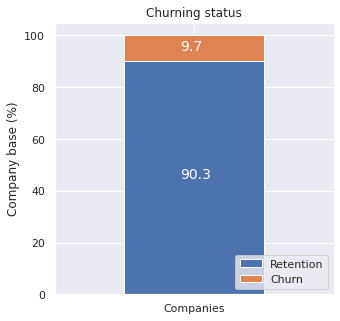

In [21]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

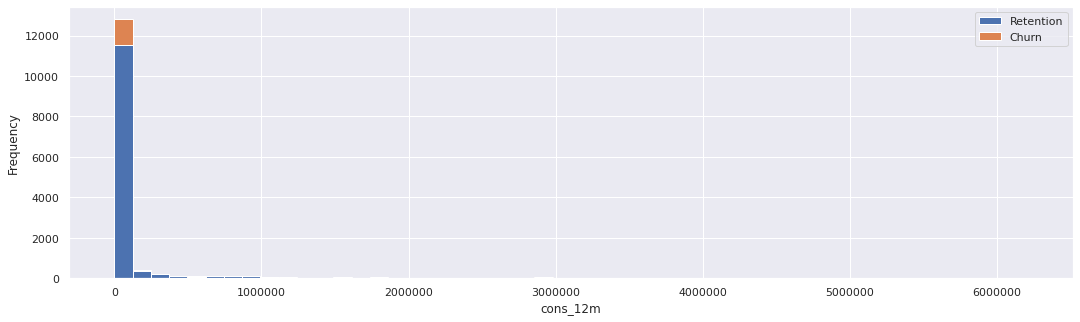

In [22]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

Now, let's get insights from data by data visualization


In [23]:
# !pip install matplotlib==3.3.0
# define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)

# plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, if_sort=False, figsize=(9,6)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

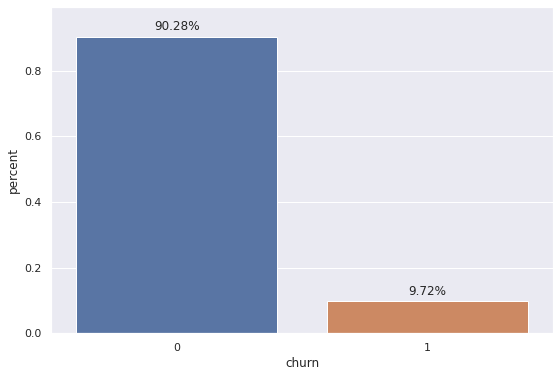

In [24]:
# !pip install --upgrade matplotlib
# !pip install matplotlib==3.3.0

# !pip install matplotlib==3.1.3
plot_bar_chart_with_percent_label(df=client_df, target_variable='churn',if_sort=False, gap_label_bar=0.02, figsize=(9,6))

Around 9% of the customers change their providers.

Let's check categorical features' distribution. (Note: Discrete numeric features actually can be seen as categorial features representing the categories.)



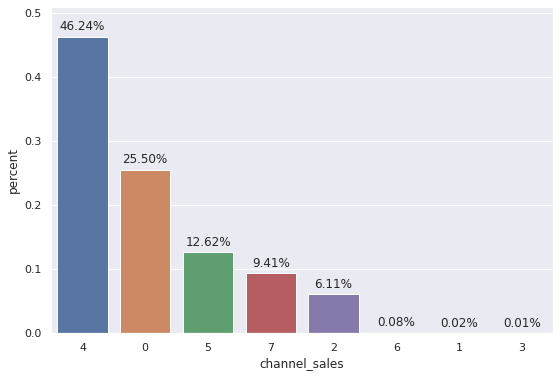

In [25]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='channel_sales', if_sort=True, gap_label_bar=0.01)


Type 4 is the most common sales channel. Type 1, 3 and 6 sales channels are very rare.

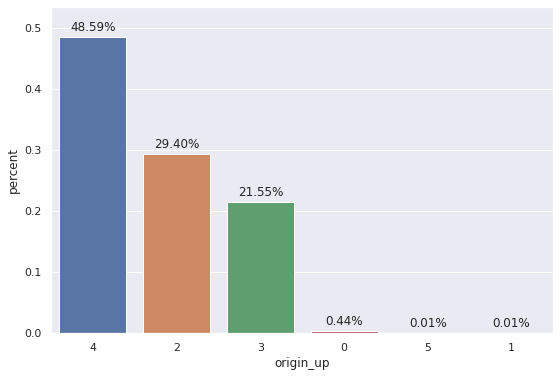

In [26]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='origin_up', if_sort=True, gap_label_bar=0.01)

Type 4 is the most common electricty campaign that customers first subscribed to. Very few customers first subscribed to Type 0, 1 and 5 electricity campaign.

Plot stacked bar charts to show the feature distribution about the churning customers and non-churning customers.



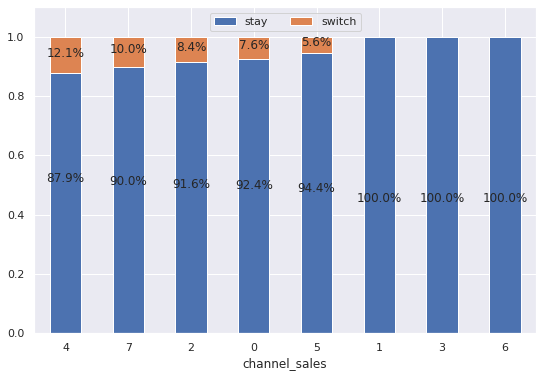

In [27]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='channel_sales', if_sort=True)

For the customers from different sales channels, the proportion of churning customers ranges from 5.6% to 12.1% (excluding rare channels).

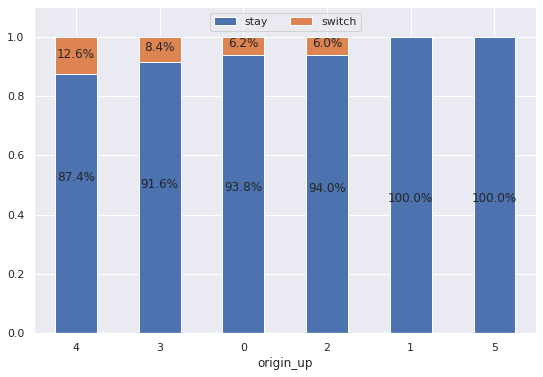

In [28]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='origin_up', if_sort=True)



For the customers who first subscribed to different electricity campaigns, the proportion of churning customers ranges from 6.0% to 12.6% (excluding type 1 and type 5).

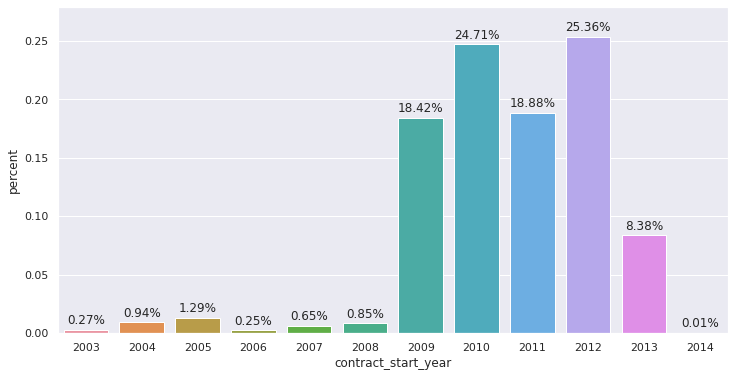

In [29]:
#
client_df['contract_start_year'] = client_df['date_activ'].dt.year
client_df['contract_end_year'] = client_df['date_end'].dt.year
plot_bar_chart_with_percent_label(df=client_df, target_variable='contract_start_year', if_sort=False, gap_label_bar=0.005, figsize=(12,6))

Most cutomers started their contracts from 2009 to 2013. Among these cutomers, it seems newer customers are more likely to switch to other providers.

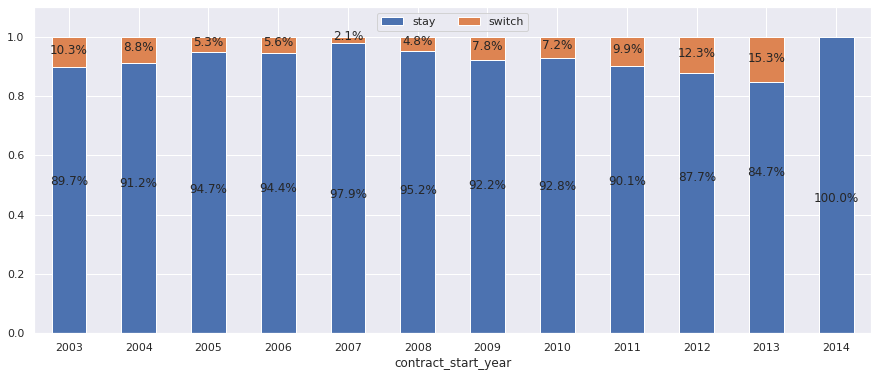

In [30]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='contract_start_year', if_sort=False, figsize=(15,6))

Most cutomers stayed with the current providers for 3 to 6 years. Among these customers, it seems newer customers are more likely to switch to other providers.

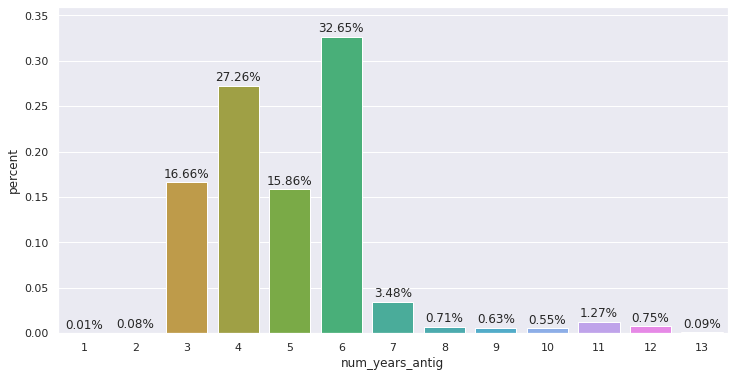

In [31]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='num_years_antig', if_sort=False, gap_label_bar=0.005, figsize=(12,6))

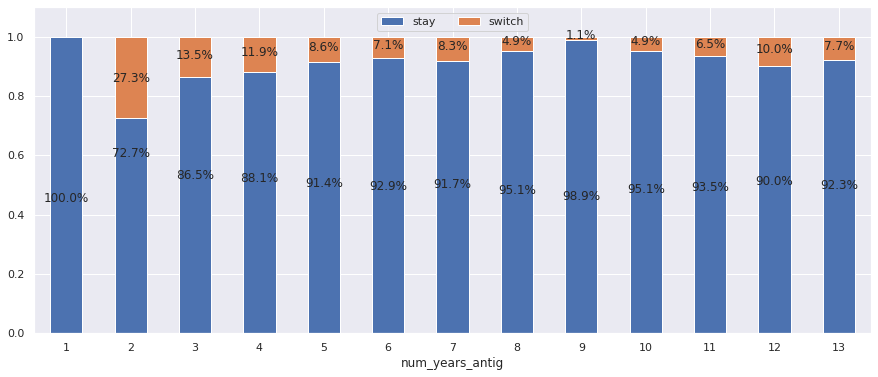

In [32]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='num_years_antig', if_sort=False, figsize=(15,6))

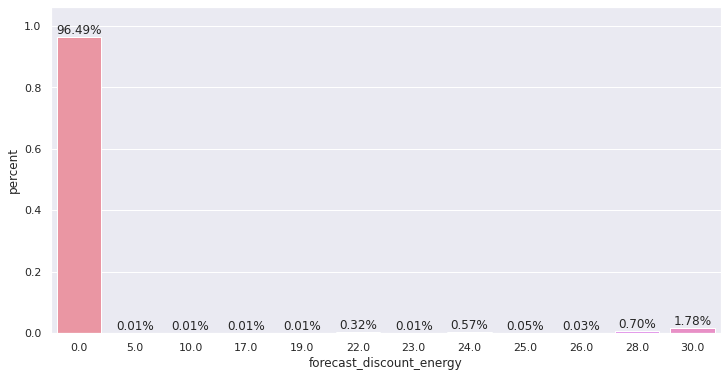

In [33]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='forecast_discount_energy', if_sort=False, gap_label_bar=0.01, figsize=(12,6))

The vast majority of cutomers' forecasted value of current discount is 0.

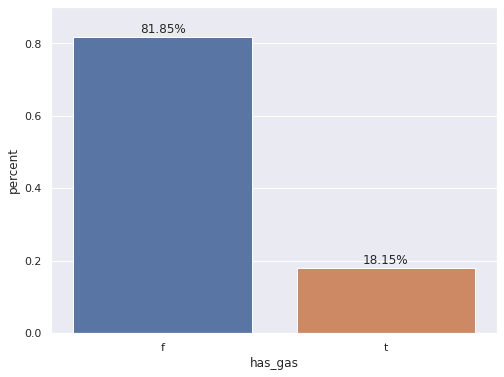

In [34]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='has_gas', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

Electricity clients are more likely to churn than electricity and gas clients.

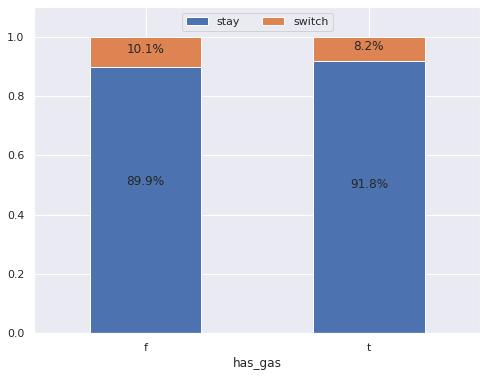

In [35]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='has_gas', if_sort=False, figsize=(8,6))
# bu if we want to have more accuracy we can  use other methods that can help us achieve more accuracy 

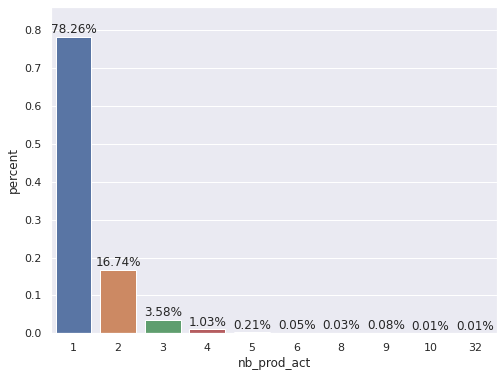

In [36]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='nb_prod_act', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

Most customers only had 1 or 2 active products and services.

Let's view price dataset

We can see not all customers have the same number of price records. The vast majority of customers have 12 price reocrds and very few customers has less than 12 records.

In [37]:
price_df['id'].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

In [38]:
price_df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

Combined with the above findings, most customers have a 12-month price records each. Luckily, every customer has the last-month's reocrd (2015-12-01), this will be helpful in identifying price sensitivity.



Plot histograms of price features. The values of each feature are centred around some points.

In [39]:
# plot histogram
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

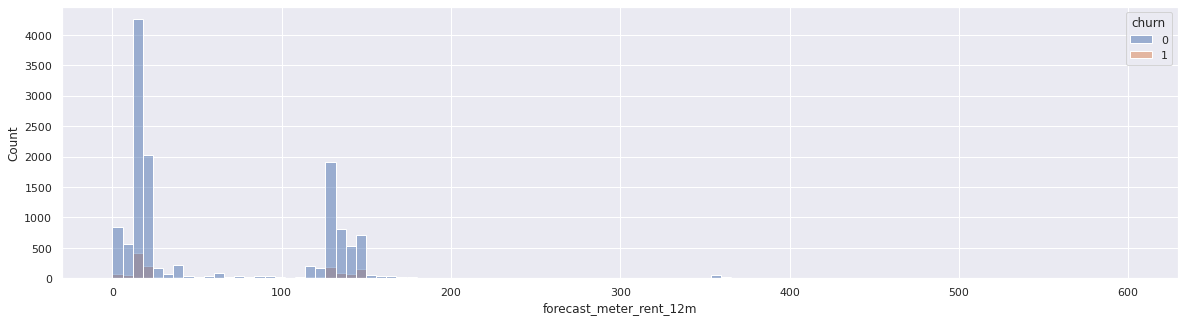

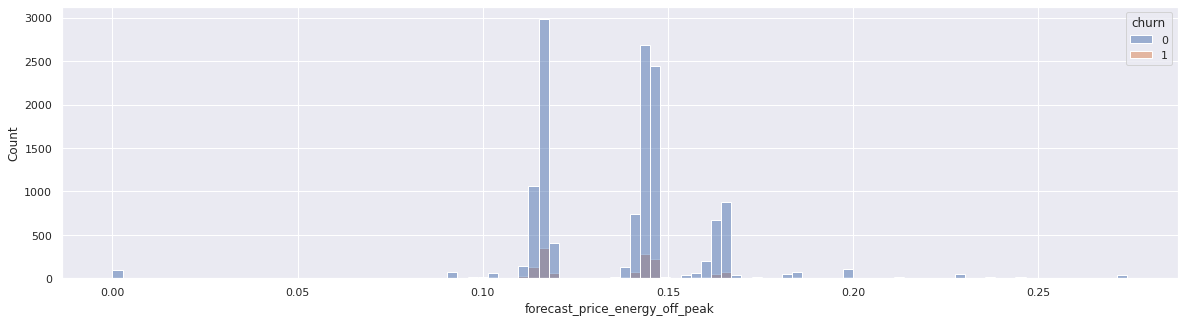

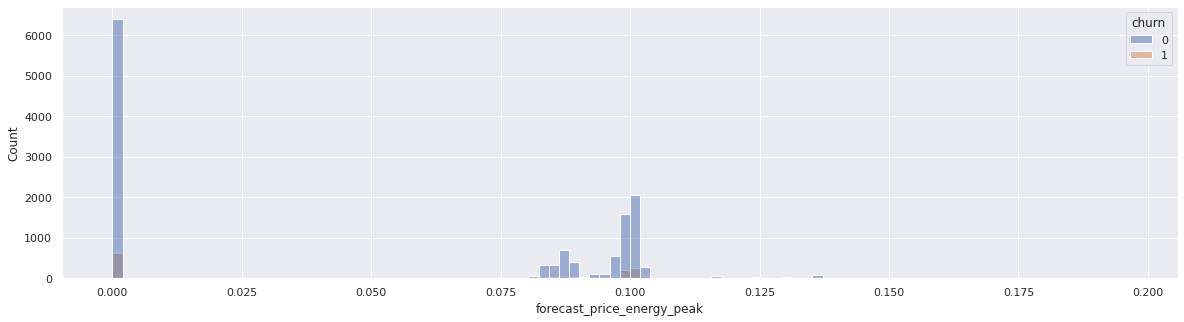

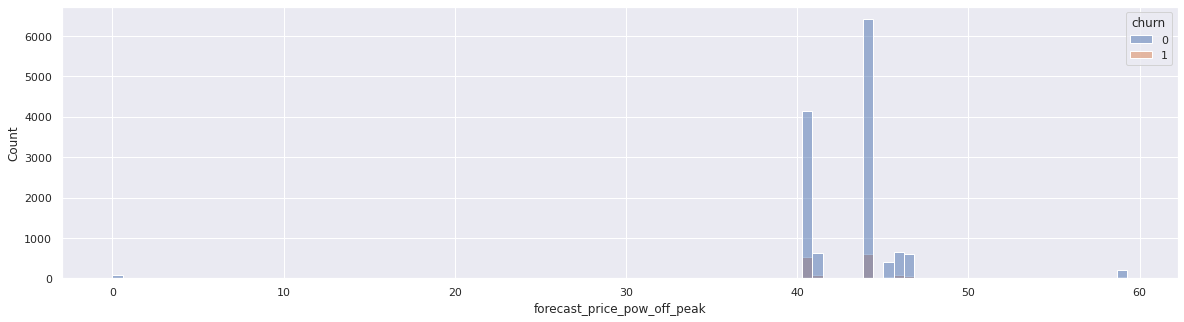

In [40]:
for attr in ['forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',]:
  plot_histogram_by_churn(df=client_df, target_variable=attr)

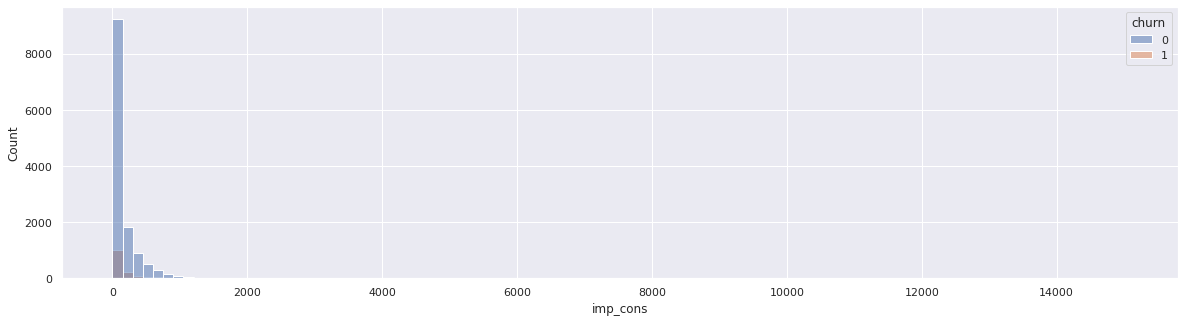

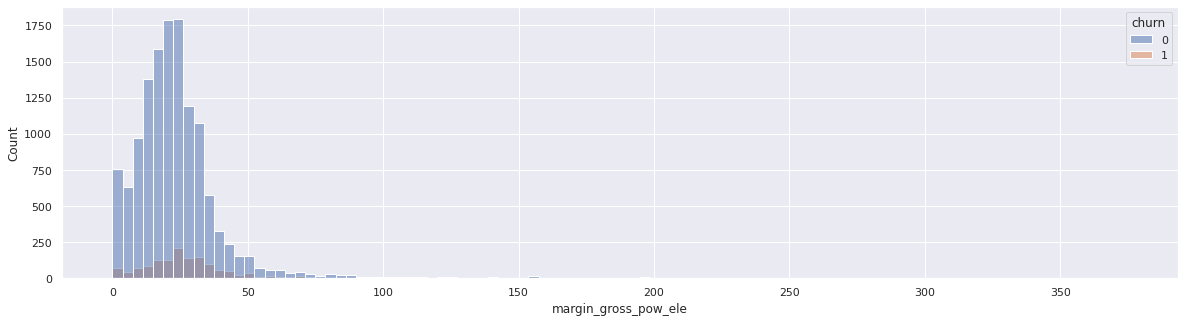

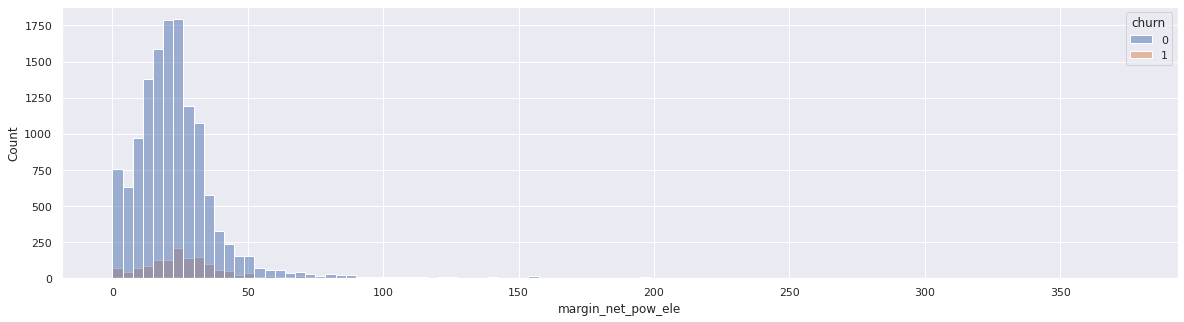

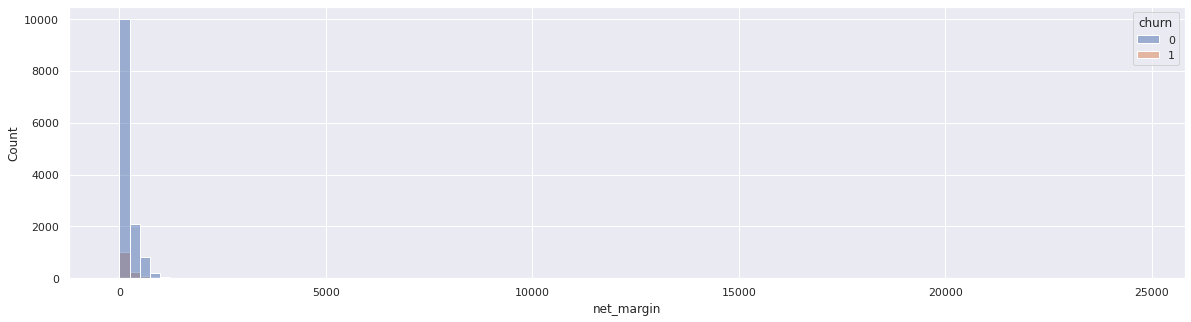

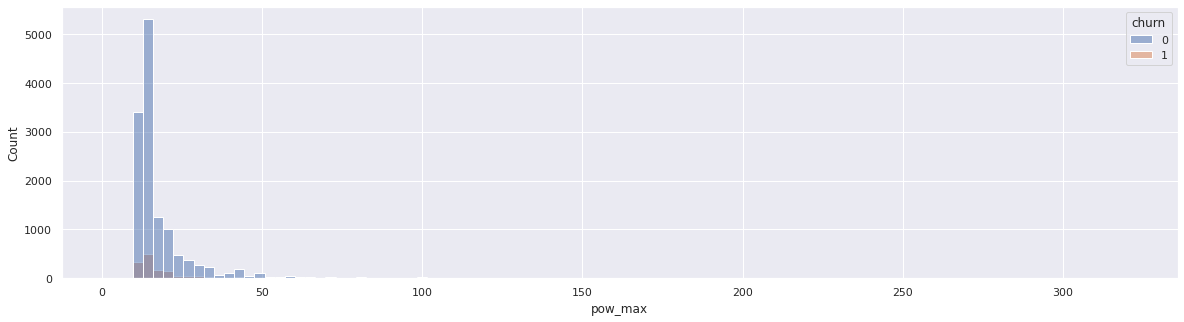

In [41]:
for attr in ['imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram_by_churn(df=client_df, target_variable=attr)

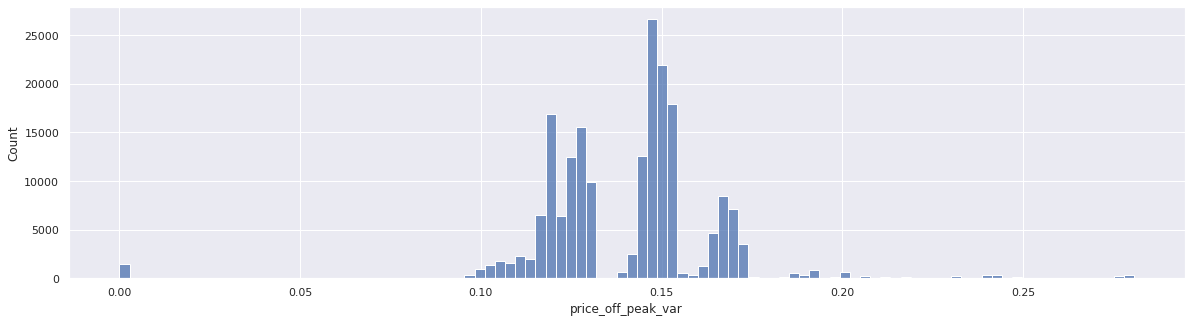

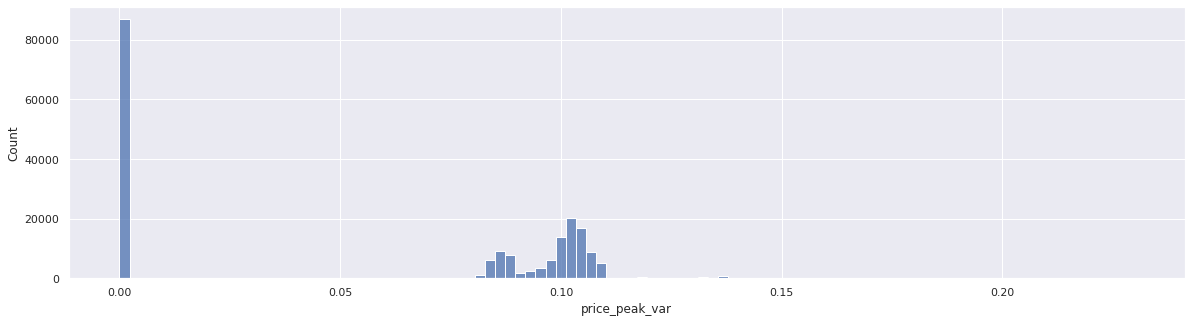

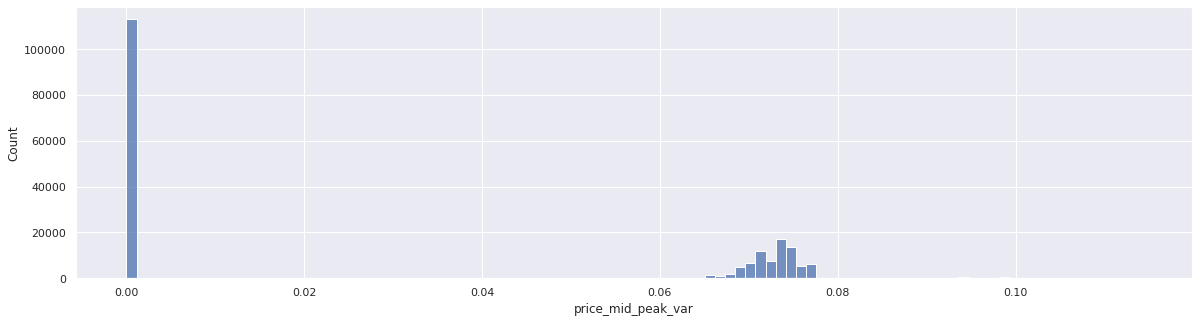

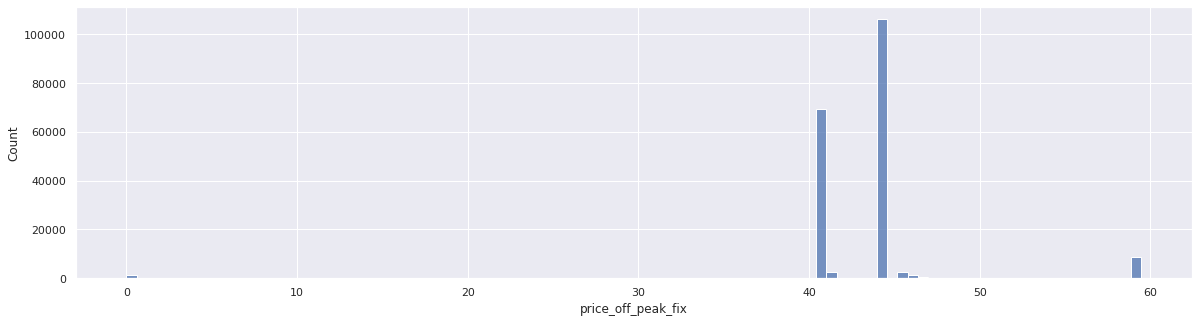

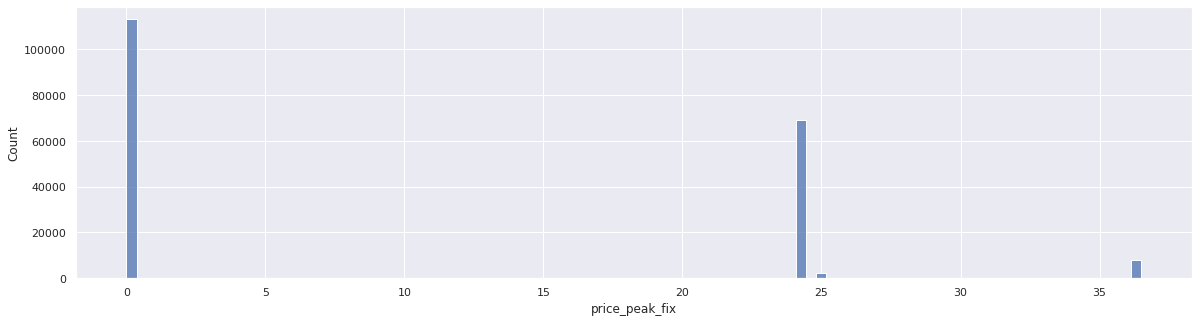

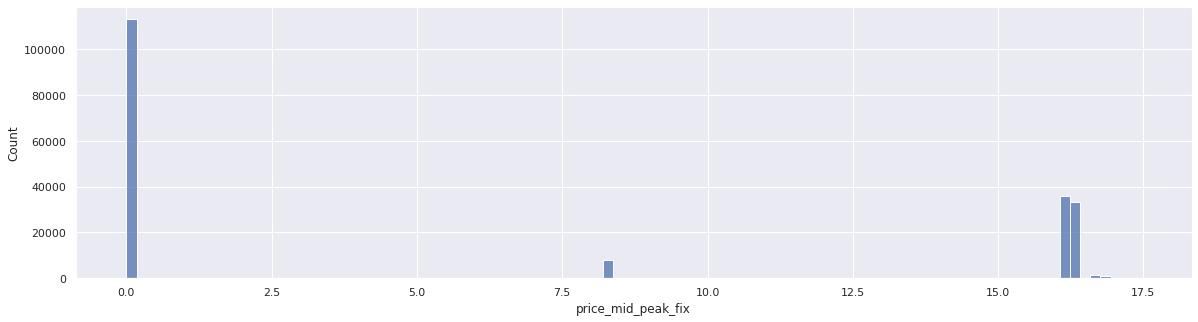

In [42]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_df, target_variable=attr, if_churn=False)

## Sub-Task 2

Now, let's check customers sensitivity to price. (Note: Normally, assuming other factors do not change, when the price increases and some cutomers switch, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. But, if there is a decrease or no change in the price and cutomers still change their proveiders, I think in this case we cannot say these cutomers are sensitive to price.)

Calculate maximum, minimum and average prices over the whole year

In [43]:
stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price_df.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
#Merge client dataset to the above dataset to add churn data
# add churn values
price_stat = price_stat.merge(client_df[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat = price_stat.dropna(subset=['churn']).reset_index(drop=True)
price_stat.head(3)


,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Calculate the biggest changes in prices over the whole year.

In [45]:

for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000


Most cutomers' prices did not change much and kept stable.

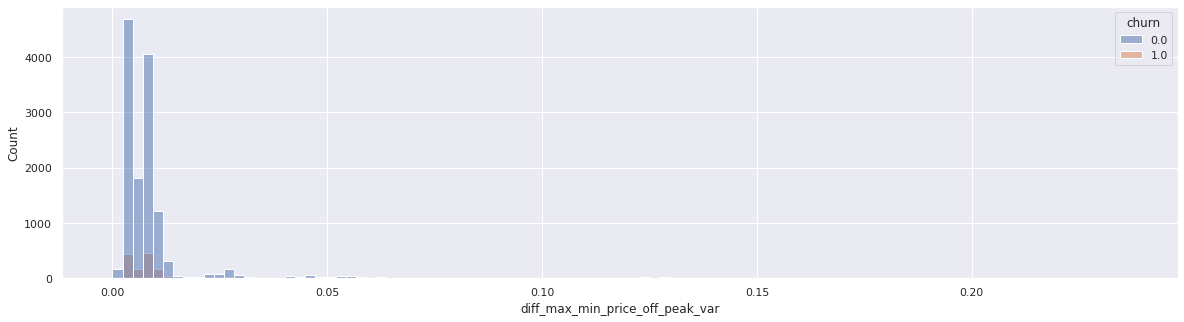

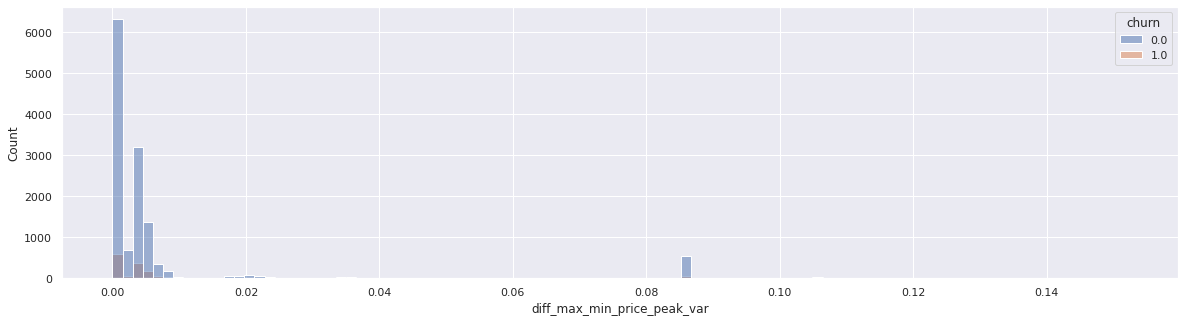

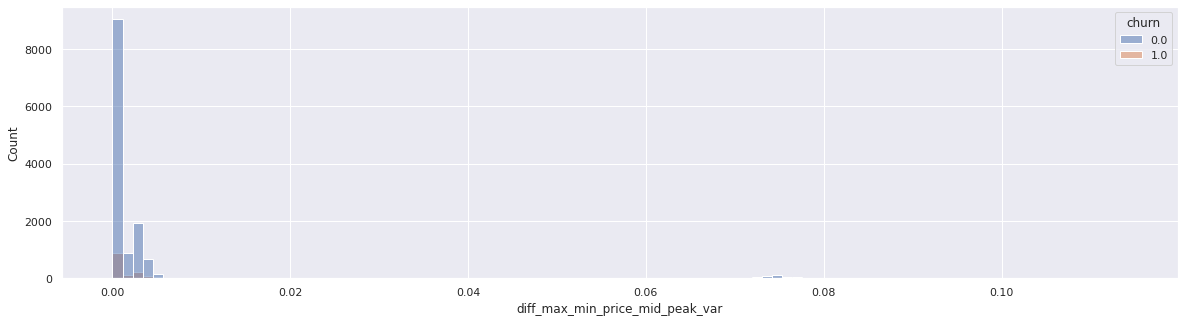

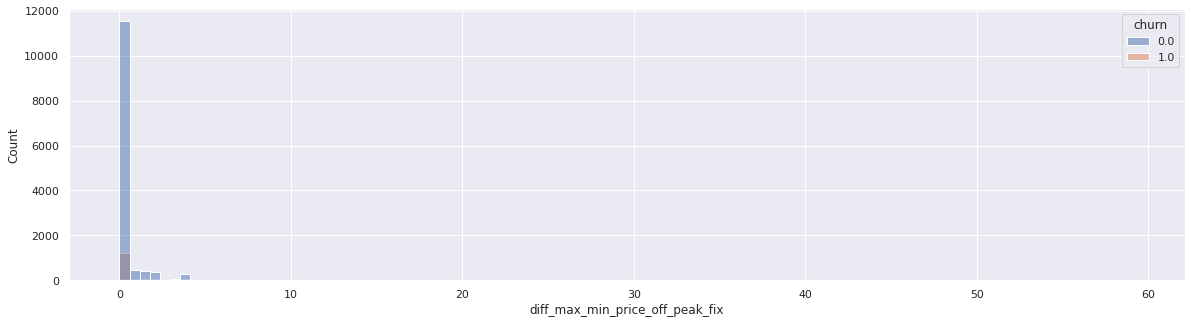

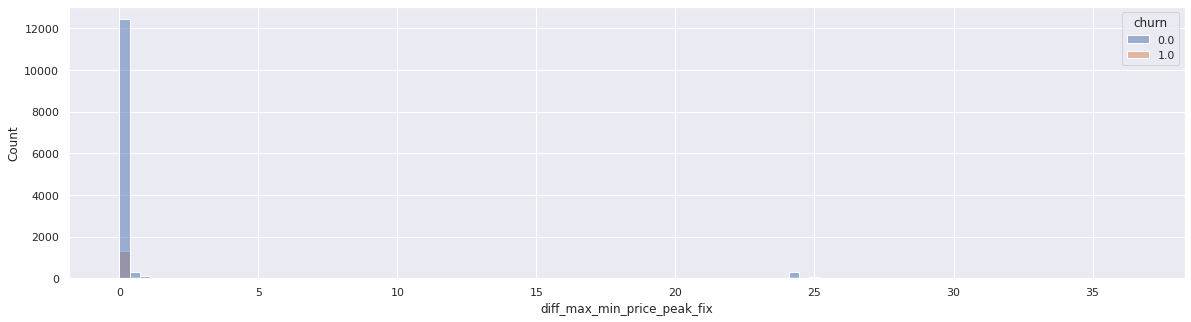

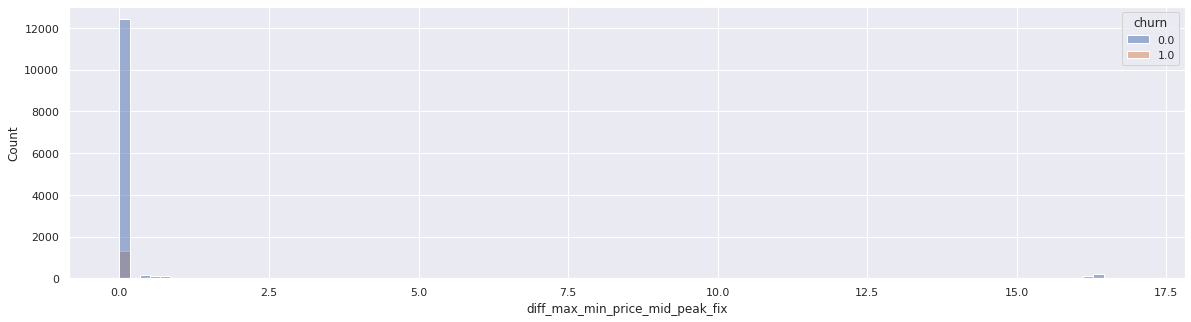

In [46]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_max_min_{attr}', if_churn=True)

Calculate the difference between the price last month (2015-12-01) and mean price.

In [47]:
# add diff
for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,0.003541,0.162916,0.097749,0.065166,-0.004432,-0.002121,0.000559,0.027153,0.016292,0.010861
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.177779,0.000000,0.000000,-0.002483,0.000000,0.000000,0.059260,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.500000,0.000000,0.000000,0.019722,0.000000,0.000000,0.625000,0.000000,0.000000


Most cutomers' prices last month were very close to the mean prices over the whole year.

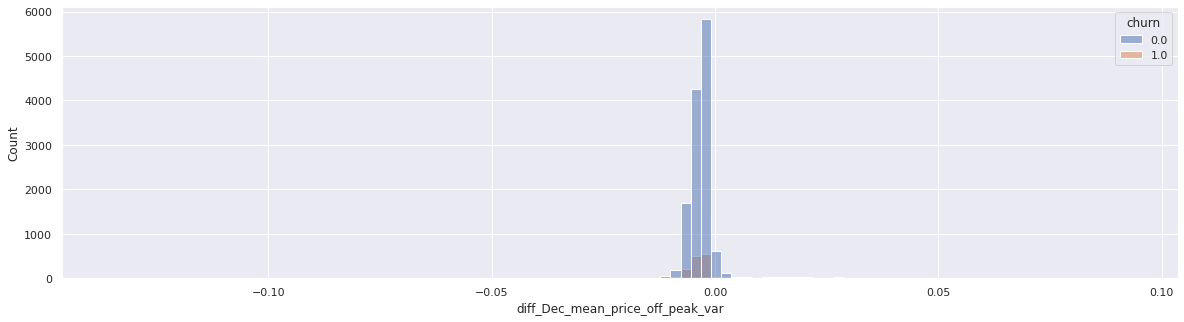

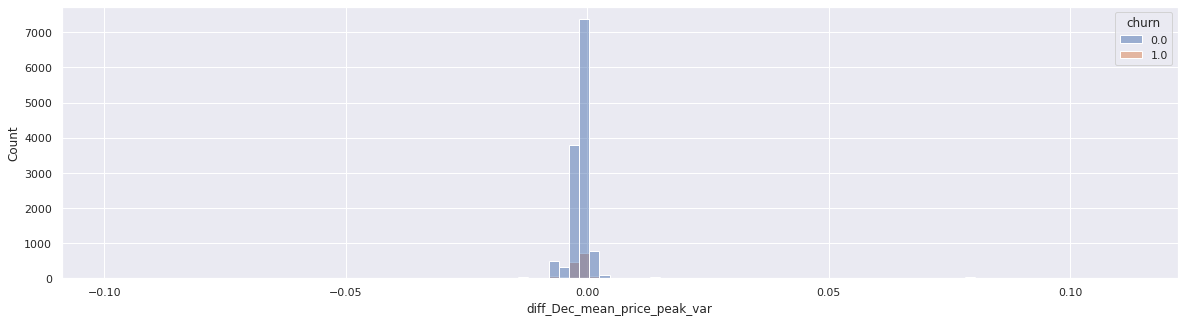

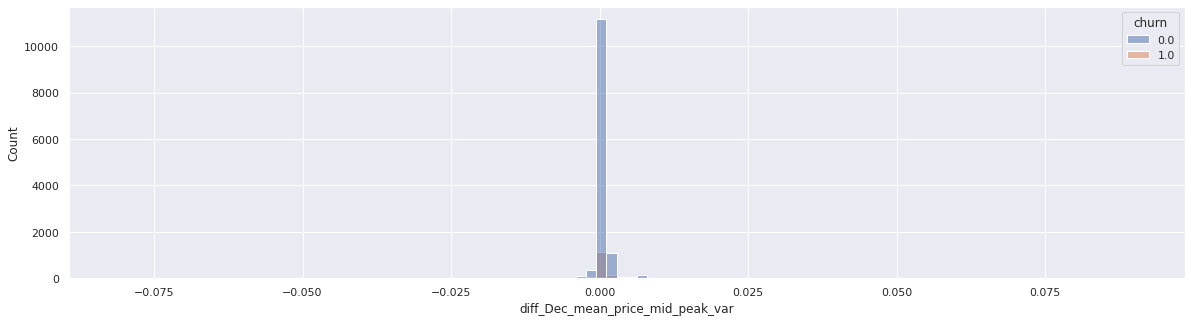

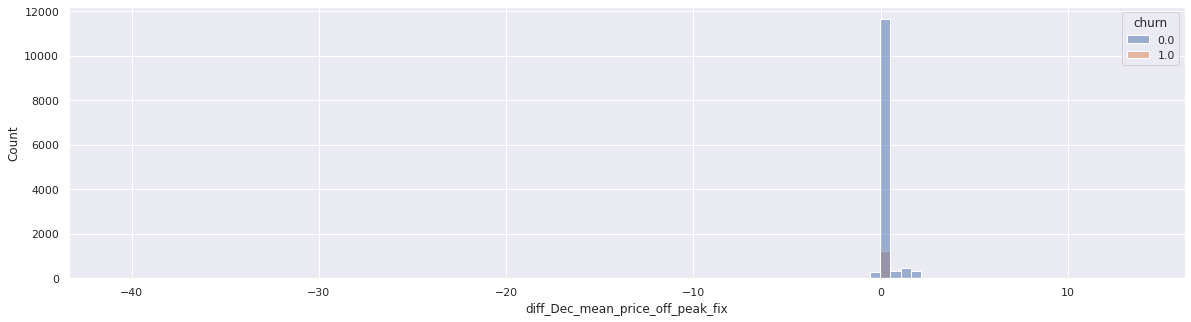

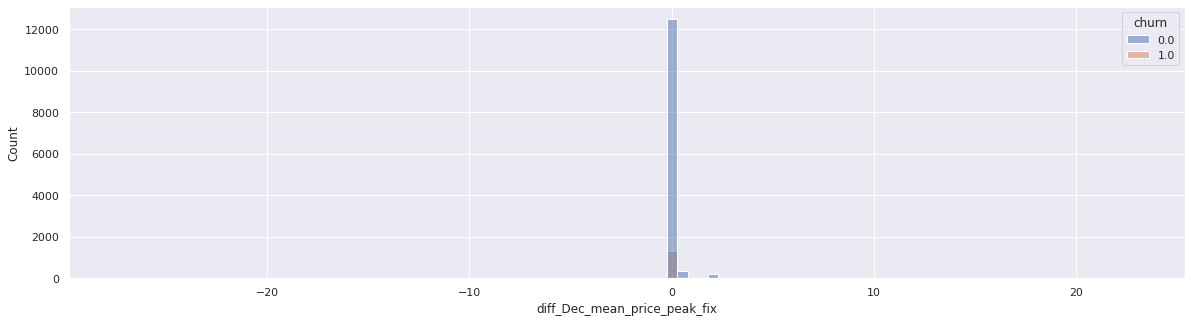

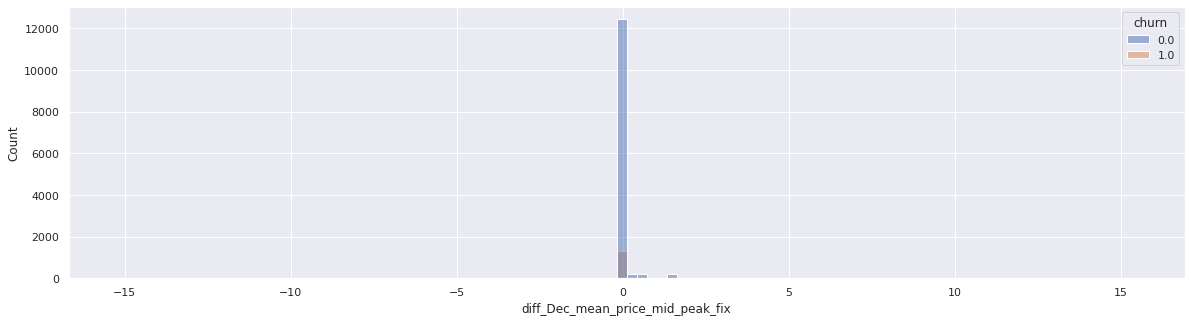

In [48]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_Dec_mean_{attr}', if_churn=True)

Check whether changes in prices would affect customer churn (only considering off peak prices)

Among the cutomers whose off-peak enery prices increased, around 9.72% of customers changed their providers.

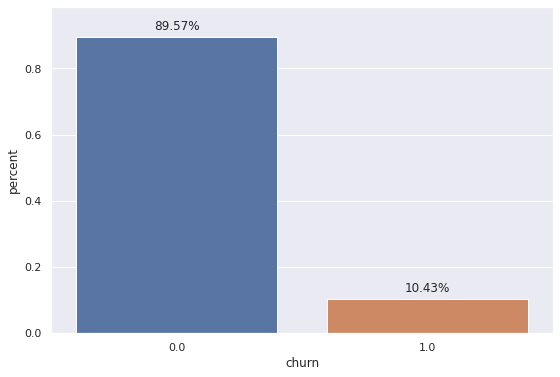

In [49]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

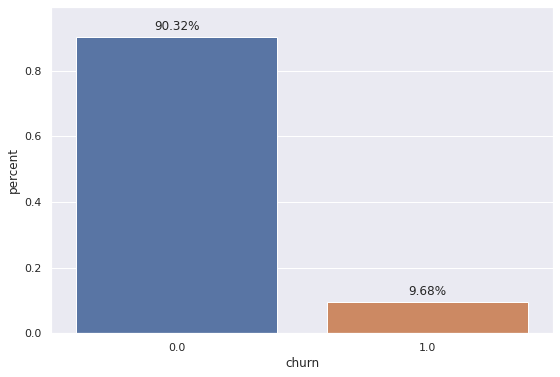

In [50]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

Among the cutomers whose off-peak energy prices did not increase (decreased or did not change), also around 9.72% of customers changed their providers.

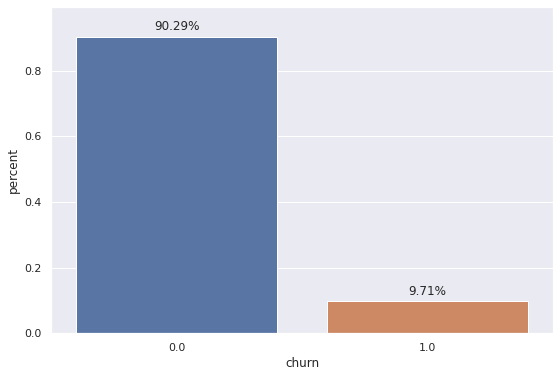

In [51]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

Among the cutomers whose off-peak power prices increased, around 9.72% of customers changed their providers.

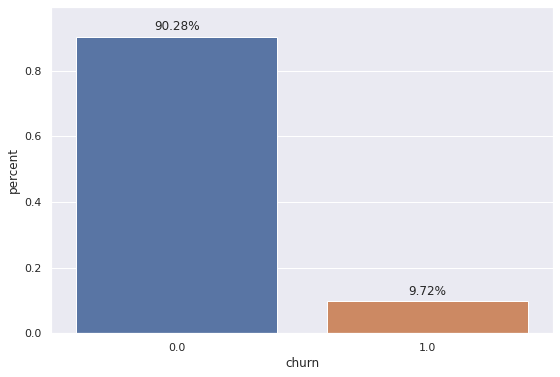

In [52]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']<=0], target_variable='churn', gap_label_bar=0.02)

Among the cutomers whose off-peak enery prices did not increase (decreased or did not change), also around 9.72% of customers changed their providers.

**From the above results, we can see no matter how prices changed, proportion of churning customers always stayed around 9.72%. In other words, changes in prices did not affect customer churn. Therefore, we can conclude customers were not sensitive to prices.** 



**From all results above, we can conclude customers were not sensitive to prices.**  

## Sub_Task 3


Key findings

1. About 9.72% of customers changed providers.

2. Numeric variables on consumption are highly skewed.

3. Changes in prices does not affect customer churn.

Suggestions

1. Competitor price data – If other providers can gave a much better offer than the current provider, customers were more likely to transfer to new provider even if their current prices dropped.

2. Need to clarify what values of zero in price data represent. If the prices of zero stand for free power or energy, what is the reason for that.

3. Other possible factors, such as customer satisfaction. For example, if providers could keep providing excellent customer services, it is very likely a rise in prices will not lead to customer churn.

In [53]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_stat, on='id')
merged_data.to_csv('clean_data_after_eda.csv')



## Task 3: Feature Engineering & Modelling

### Sub-Task 1

Your colleague has done some work on engineering the features within the cleaned dataset and has calculated a feature which seems to have predictive power.

This feature is “the difference between off-peak prices in December and January the preceding year”.

Run the cells in the notebook provided (named feature_engineering.ipynb) to re-create this feature. then try to think of ways to improve the feature’s predictive power and elaborate why you made those choices.

In [54]:
# load packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [55]:
# drop useless columns
train_data = client_df.copy()
train_data['year_modif_prod'] = train_data['date_modif_prod'].dt.year
train_data['year_renewal'] = train_data['date_renewal'].dt.year
train_data = train_data.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])
# 
has_gas_encoder = LabelEncoder()
train_data['has_gas'] = has_gas_encoder.fit_transform(train_data['has_gas'])
# add new feature "diff_dec_jan_off_peak_var" and "diff_dec_jan_off_peak_fix". I just calculate the differnece between last price and first price for each customer.
diff_dec_jan_off_peak_var = price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(-1) - price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(0)
diff_dec_jan_off_peak_var = diff_dec_jan_off_peak_var.reset_index(name='diff_dec_jan_off_peak_var')
diff_dec_jan_off_peak_fix = price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(-1) - price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(0)
diff_dec_jan_off_peak_fix = diff_dec_jan_off_peak_fix.reset_index(name='diff_dec_jan_off_peak_fix')
train_data = train_data.merge(diff_dec_jan_off_peak_var, on='id', how='left')
train_data = train_data.merge(diff_dec_jan_off_peak_fix, on='id', how='left')
# also add the above differences of other prices
for attr in ['price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = price_df.sort_values(by=['price_date']).groupby(['id'])[attr].nth(-1) - price_df.sort_values(by=['price_date']).groupby(['id'])[attr].nth(0)
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    train_data = train_data.merge(diff_dec_jan_temp, on='id', how='left')
# add price changing trends
train_data = train_data.merge(price_stat[['id','diff_Dec_mean_price_off_peak_var','diff_Dec_mean_price_off_peak_fix',
                                          'diff_Dec_mean_price_peak_var','diff_Dec_mean_price_peak_fix',
                                          'diff_Dec_mean_price_mid_peak_var','diff_Dec_mean_price_mid_peak_fix',
                                        ]], on='id', how='left')

#
train_data.head()



,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,...,-0.017912,-24.339581,-0.071536,-16.226389,0.021246,3.324664,-0.015266,-22.352010,-0.066530,-14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.000000,0.000000,0.000000,0.000000,-0.002009,0.133335,-0.007124,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.000528,0.000000,0.000000,0.000000,-0.002714,0.059260,-0.000012,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.000000,0.000000,0.000000,-0.002624,0.044445,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,...,-0.002302,0.097749,0.003487,0.065166,-0.004268,0.040729,-0.001965,0.024437,0.000854,0.016292


Create training data and training label.

Note: for tree-based models

there is no need to perform data scaling, unlike other machine learning models.
do not apply one-hot encoding to processing categorical variables, just use label-encoding to convert categorical variables to numeric variables.

In [56]:
X = train_data.drop(columns=['id','churn'])
y = train_data['churn']
X.shape, y.shape

((14606, 36), (14606,))

### Sub-Task 2

Now that you have a dataset of cleaned and engineered features, it is time to build a predictive model to see how well these features are able to predict a customer churning. It is your task to train a Random Forest classifier and to evaluate the results in an appropriate manner. We would also like you to document the advantages and disadvantages of using a Random Forest for this use case.

According to the task requirement, build a RandomForest model.

As there is no testing set, the "out-of-fold" cross validation strategy is used to evaluate the model's performace. Besides, the training set is a very imbalanced dataset, so I use precision and recall as the metrics, instead of accuracy (results of accuracy are still shown, but not for evaluating the model's performance). As the goal of this task is not finding the optimal parameters, I do not tune the model's parameters.

In [57]:
# 
import numpy as np
pred_train_labels = np.zeros(shape=(X.shape[0], 2))   # pred training labels
feature_importance_df = pd.DataFrame(data={'feature_name':X.columns, 'feature_importance':[0]*len(X.columns)})
# create cv dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
fold_counter = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    rf = RandomForestClassifier(random_state=56)
    # train model
    rf.fit(X_train, y_train)
    pred_train_labels[test_index] = rf.predict_proba(X_test)
    feature_importance_df['feature_importance'] = feature_importance_df['feature_importance'] + (rf.feature_importances_)
    print(f"Fold {fold_counter} Precision {precision_score(y_test, rf.predict(X_test)):.3f} Recall {recall_score(y_test, rf.predict(X_test)):.3f} Accuracy {accuracy_score(y_test, rf.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# predicted labels
pred_y = pred_train_labels.argmax(axis=-1)
print(f"Total  Precision {precision_score(y, pred_y):.3f} Recall {recall_score(y, pred_y):.3f} Accuracy {accuracy_score(y, pred_y):.3f}")

Fold 1 Precision 0.714 Recall 0.053 Accuracy 0.906
Fold 2 Precision 0.885 Recall 0.081 Accuracy 0.910
Fold 3 Precision 0.895 Recall 0.060 Accuracy 0.908
Fold 4 Precision 0.944 Recall 0.060 Accuracy 0.908
Fold 5 Precision 0.850 Recall 0.060 Accuracy 0.908
Total  Precision 0.856 Recall 0.063 Accuracy 0.908


The below figure displays how important each feature is when growing trees.

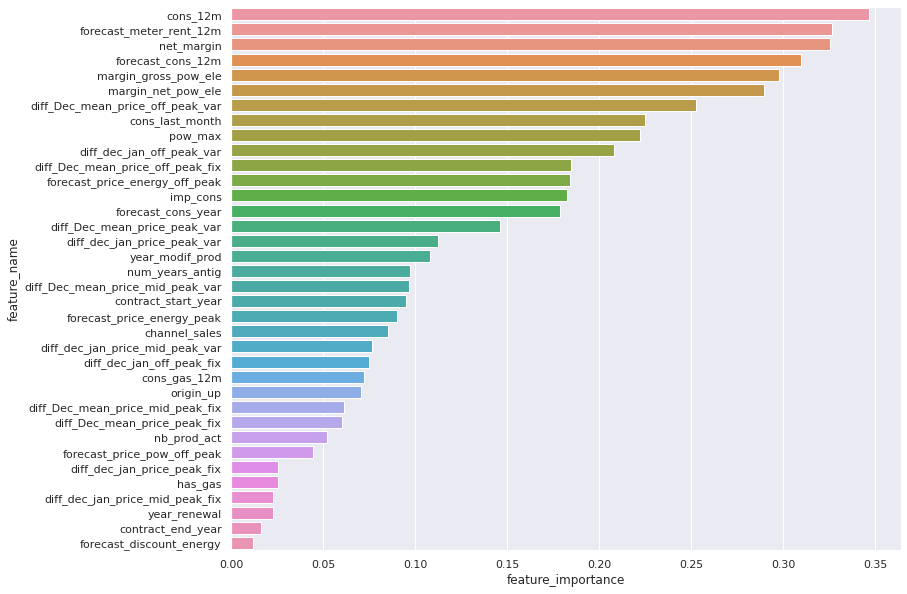

In [58]:

import matplotlib
fig = plt.figure(figsize=(12,10))
ax = sns.barplot(data=feature_importance_df.sort_values(by=['feature_importance'], ascending=False), y='feature_name', x='feature_importance')


In [59]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13187
           1       0.86      0.06      0.12      1419

    accuracy                           0.91     14606
   macro avg       0.88      0.53      0.53     14606
weighted avg       0.90      0.91      0.87     14606



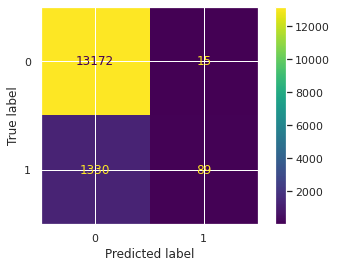

In [60]:
cm = confusion_matrix(y, pred_y, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

Based on the results above, we can see the performance is very bad. Although the accuracy is up to 90%, it is misleading and pointless, as we only focus on correctly predicting the positive class rather than the nagetive class. The model can only find out 6% of real positive samples. But luckily, in the predicted positive samples, up to 86% of them are real positive samples.

Bonus task: identify the impact of a 20% discount
This is a tricky problem.

* first, intuitively, we have concluded that changes in prices do not have a significant impact on customer churn. So, a discount should be unable to prevent customer churn.
* second, we cannot really identify whether a discount can prevent customer churn, as we do not exactly know what will happen in the future.
Therefore, I try to calculate the expected profit based on the probability of customer churn and evaluate the impact of the discount.

In [61]:
prob_no_discount = pd.DataFrame(data = pred_train_labels, columns=['0', '1'])
prob_no_discount['id'] = train_data['id']
prob_no_discount = prob_no_discount[['id','0','1']]
prob_no_discount

,id,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,0.66,0.34
1,d29c2c54acc38ff3c0614d0a653813dd,0.95,0.05
2,764c75f661154dac3a6c254cd082ea7d,0.89,0.11
3,bba03439a292a1e166f80264c16191cb,0.84,0.16
4,149d57cf92fc41cf94415803a877cb4b,0.99,0.01
...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0.90,0.10
14602,d0a6f71671571ed83b2645d23af6de00,0.41,0.59
14603,10e6828ddd62cbcf687cb74928c4c2d2,0.86,0.14
14604,1cf20fd6206d7678d5bcafd28c53b4db,0.93,0.07


We need to predcit the probability of churn when applying a 20% discount. Note: I still use the data on this year, not the next year.

In [62]:
# drop useless columns
test_data = client_df.copy()
test_data['year_modif_prod'] = test_data['date_modif_prod'].dt.year
test_data['year_renewal'] = test_data['date_renewal'].dt.year
test_data = test_data.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])
# 
has_gas_encoder = LabelEncoder()
test_data['has_gas'] = has_gas_encoder.fit_transform(test_data['has_gas'])
# apply a 20% discount
diff_dec_jan_off_peak_var = price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(-1)*0.8 - price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(0)*0.8
diff_dec_jan_off_peak_var = diff_dec_jan_off_peak_var.reset_index(name='diff_dec_jan_off_peak_var')
diff_dec_jan_off_peak_fix = price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(-1)*0.8 - price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(0)*0.8
diff_dec_jan_off_peak_fix = diff_dec_jan_off_peak_fix.reset_index(name='diff_dec_jan_off_peak_fix')
test_data = test_data.merge(diff_dec_jan_off_peak_var, on='id', how='left')
test_data = test_data.merge(diff_dec_jan_off_peak_fix, on='id', how='left')
# also add the above differences of other prices
for attr in ['price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = price_df.sort_values(by=['price_date']).groupby(['id'])[attr].nth(-1)*0.8 - price_df.sort_values(by=['price_date']).groupby(['id'])[attr].nth(0)*0.8
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    test_data = test_data.merge(diff_dec_jan_temp, on='id', how='left')
# add price changing trends
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat_test = price_df.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': ['mean'], 'price_peak_var': ['mean'], 'price_mid_peak_var': ['mean'],
                                                      'price_off_peak_fix': ['mean'], 'price_peak_fix': ['mean'], 'price_mid_peak_fix': ['mean'],})
# flatten the column names
price_stat_test.columns = ['_'.join(x) for x in zip(price_stat_test.columns.get_level_values(0), price_stat_test.columns.get_level_values(1))]
price_stat_test = price_stat_test.reset_index()
# add diff
for attr in price_attr:
    price_stat_test[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat_test['id'])].groupby(['id'])[attr].nth(-1).values*0.8 - price_stat_test[f'{attr}_mean']*0.8
#
test_data = test_data.merge(price_stat_test[['id','diff_Dec_mean_price_off_peak_var','diff_Dec_mean_price_off_peak_fix',
                                          'diff_Dec_mean_price_peak_var','diff_Dec_mean_price_peak_fix',
                                          'diff_Dec_mean_price_mid_peak_var','diff_Dec_mean_price_mid_peak_fix',
                                        ]], on='id', how='left')

#
test_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,...,-0.014330,-19.471665,-0.057229,-12.981111,0.016997,2.659732,-0.012213,-17.881608,-0.053224,-11.921072
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.000000,0.000000,0.000000,0.000000,-0.001607,0.106668,-0.005699,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.000422,0.000000,0.000000,0.000000,-0.002171,0.047408,-0.000010,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.000000,0.000000,0.000000,-0.002099,0.035556,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,...,-0.001842,0.078199,0.002790,0.052133,-0.003415,0.032583,-0.001572,0.019550,0.000683,0.013033


In [63]:
#
testing_set = test_data.drop(columns=['id','churn'])
testing_set.shape

(14606, 36)

In [64]:
pred_train_labels = np.zeros(shape=(X.shape[0], 2))   # pred training labels
pred_test_labels = np.zeros(shape=(testing_set.shape[0], 2))
# create cv dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
fold_counter = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    rf = RandomForestClassifier(random_state=56)
    # train model
    rf.fit(X_train, y_train)
    pred_train_labels[test_index] = rf.predict_proba(X_test)
    pred_test_labels += rf.predict_proba(testing_set)/5
    print(f"Fold {fold_counter} Precision {precision_score(y_test, rf.predict(X_test)):.3f} Recall {recall_score(y_test, rf.predict(X_test)):.3f} Accuracy {accuracy_score(y_test, rf.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# 
print(f"Total  Precision {precision_score(y, pred_y):.3f} Recall {recall_score(y, pred_y):.3f} Accuracy {accuracy_score(y, pred_y):.3f}")


Fold 1 Precision 0.714 Recall 0.053 Accuracy 0.906
Fold 2 Precision 0.885 Recall 0.081 Accuracy 0.910
Fold 3 Precision 0.895 Recall 0.060 Accuracy 0.908
Fold 4 Precision 0.944 Recall 0.060 Accuracy 0.908
Fold 5 Precision 0.850 Recall 0.060 Accuracy 0.908
Total  Precision 0.856 Recall 0.063 Accuracy 0.908


In [65]:
#Combine all the resultsinto a one dataset
prob_discount = pd.DataFrame(data=pred_test_labels, columns=['0_dis','1_dis'])
customer_prob = prob_no_discount.join(prob_discount)
customer_prob.head()

,id,0,1,0_dis,1_dis
0,24011ae4ebbe3035111d65fa7c15bc57,0.66,0.34,0.422,0.578
1,d29c2c54acc38ff3c0614d0a653813dd,0.95,0.05,0.948,0.052
2,764c75f661154dac3a6c254cd082ea7d,0.89,0.11,0.888,0.112
3,bba03439a292a1e166f80264c16191cb,0.84,0.16,0.936,0.064
4,149d57cf92fc41cf94415803a877cb4b,0.99,0.01,0.970,0.030


In [66]:
# Then, let's calculate the expected profit from customers.
# calculate expected profit of a single customer with discounted prices and without discounted prices
def expect_from_a_customer(customer_id):
    # expected values without discount
    average_yearly_price_var = price_stat[price_stat['id']==customer_id]['price_off_peak_var_mean'].values[0]
    total_yearly_usage_var = client_df[client_df['id']==customer_id]['cons_12m'].values[0]
    average_yearly_price_fix = price_stat[price_stat['id']==customer_id]['price_off_peak_fix_mean'].values[0]
    total_yearly_usage_fix = client_df[client_df['id']==customer_id]['cons_gas_12m'].values[0]
    total_profit = average_yearly_price_var*total_yearly_usage_var + average_yearly_price_fix*total_yearly_usage_fix
    # 
    prob_stay = customer_prob[customer_prob['id']==customer_id]['0'].values[0]
    expected_profit = prob_stay*total_profit
    # expected values with discount
    total_profit_dis = total_profit*0.8
    # 
    prob_stay_dis = customer_prob[customer_prob['id']==customer_id]['0_dis'].values[0]
    expected_profit_dis = prob_stay_dis*total_profit_dis
    return expected_profit, expected_profit_dis

In [67]:
# Calculate expected profit from each customer
expected_no_dis, expected_dis = [],[]
for cus_id in customer_prob['id']:
    temp = expect_from_a_customer(customer_id=cus_id)
    expected_no_dis.append(temp[0])
    expected_dis.append(temp[1])
#
customer_prob['expected_no_dis'] = expected_no_dis
customer_prob['expected_dis'] = expected_dis
customer_prob['diff_discount'] = customer_prob['expected_dis'] - customer_prob['expected_no_dis']
customer_prob

,id,0,1,0_dis,1_dis,expected_no_dis,expected_dis,diff_discount
0,24011ae4ebbe3035111d65fa7c15bc57,0.66,0.34,0.422,0.578,1.484745e+06,7.594696e+05,-725275.463026
1,d29c2c54acc38ff3c0614d0a653813dd,0.95,0.05,0.948,0.052,6.623187e+02,5.287395e+02,-133.579219
2,764c75f661154dac3a6c254cd082ea7d,0.89,0.11,0.888,0.112,8.255493e+01,6.589553e+01,-16.659399
3,bba03439a292a1e166f80264c16191cb,0.84,0.16,0.936,0.064,2.011941e+02,1.793502e+02,-21.843930
4,149d57cf92fc41cf94415803a877cb4b,0.99,0.01,0.970,0.030,5.439767e+02,4.263898e+02,-117.586885
...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0.90,0.10,0.936,0.064,1.918601e+06,1.596276e+06,-322325.008098
14602,d0a6f71671571ed83b2645d23af6de00,0.41,0.59,0.386,0.614,3.162780e+02,2.382113e+02,-78.066670
14603,10e6828ddd62cbcf687cb74928c4c2d2,0.86,0.14,0.596,0.404,1.971808e+02,1.093207e+02,-87.860111
14604,1cf20fd6206d7678d5bcafd28c53b4db,0.93,0.07,0.932,0.068,1.822685e+01,1.461284e+01,-3.614013


Expected profit from only 349 customers (2%) rise after being offered discounted prices.

In [68]:
customer_prob[customer_prob['diff_discount']>0]

,id,0,1,0_dis,1_dis,expected_no_dis,expected_dis,diff_discount
128,3c4ee938001975a4d07cf27a54de433c,0.67,0.33,0.888,0.112,3254.731758,3450.987225,196.255467
139,cf8c5db0c02e3f92592daccba41c918c,0.60,0.40,0.782,0.218,501505.138799,522902.691387,21397.552589
217,b1e773762052b38569b1e68aaa10576e,0.39,0.61,0.576,0.424,2692.006048,3180.708684,488.702636
230,9ca6298400dbc960a48a46aa6abd3db7,0.25,0.75,0.354,0.646,2565.754701,2906.486925,340.732224
346,395a6f41bbd1a0f23a64f00645264e78,0.64,0.36,0.818,0.182,4439.209887,4539.092109,99.882222
...,...,...,...,...,...,...,...,...
14384,87ec37604794b702c77225967c20f476,0.64,0.36,0.864,0.136,215.637276,232.888258,17.250982
14536,acfb0c97e40a86087f185d4846217966,0.68,0.32,0.862,0.138,213950.664602,216971.144572,3020.479971
14537,d77e823d24aa59beda5baa6bca37c903,0.63,0.37,0.846,0.154,264.275878,283.907801,19.631922
14561,37f06f14bb662b84f4f464322dce72db,0.68,0.32,0.878,0.122,1118.446236,1155.289171,36.842935


In [69]:
# 2% of all cutomers
customer_prob[customer_prob['diff_discount']>0].shape[0]/len(customer_prob)

0.023894290017800905

Among the 104 predcited churning customers, after being offered discounted prices,

the expected profit from 61 customers increase and total expected profit increase by 2250001.

the expected profit from 43 customers decrease and total expected profit decrease by 1138753.

So, it is expected that offering a discount to the predcited churning customers can bring extra profit of 1111248.

In [70]:
# number of churning customers
customer_prob[(customer_prob['1']>0.5)].shape[0]

104

In [71]:
# number of customers whose expected profit increase
customer_prob[(customer_prob['diff_discount']>0)&(customer_prob['1']>0.5)].shape[0]

61

In [72]:
# number of customers whose expected profit decreas
customer_prob[(customer_prob['diff_discount']<=0)&(customer_prob['1']>0.5)].shape[0]

43

In [73]:
# total extra profit from customers whose expected profit increase
customer_prob[(customer_prob['diff_discount']>0)&(customer_prob['1']>0.5)]['diff_discount'].sum()

2250001.9519792725

In [74]:
# total extra profit from customers whose expected profit decrease
customer_prob[(customer_prob['diff_discount']<=0)&(customer_prob['1']>0.5)]['diff_discount'].sum()

-1138753.308247779

In [75]:
# total extra profit from predicted churning customers
customer_prob[customer_prob['1']>0.5]['diff_discount'].sum()

1111248.6437314935

Based on the results above, it seems offering a discount to the predicted churning customers can increase the expected profit from these customers.